In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def generateData(numberOfClassEl, numberOfClasses):
    radius = 50
    data = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.randint(radius, 600 - radius), random.randint(radius, 400 - radius)
        for rowNum in range(numberOfClassEl):
            data.append([[random.gauss(centerX, radius/2), random.gauss(centerY, radius/2)], classNum])
    return data

def splitTrainTest (data, testPercent):
    trainData = []
    testData  = []
    for row in data:
        if random.random() < testPercent:
            testData.append(row)
        else:
            trainData.append(row)
    return trainData, testData	

def KNN_for_point(point, train,k):
    distances = []
    for p in train:
        distances.append(dist(p[0], point[0]))
    sort = [train[x] for x in np.argsort(distances)]
    neighbors = sort[:k]
    classes = np.zeros(25)
    for n in neighbors:
      classes[n[1]] += 1
    return np.argmax(classes)

def KNN(train, test, k):
    pred_label = []
    for i in range(len(test)):
        pred_label.append(KNN_for_point(test[i], train, k=3))
    return pred_label

In [4]:
n, cl = 100, 3
colors = ['red', 'blue', 'purple', 'green']
points = generateData(n, cl)
train, test = splitTrainTest(points, 0.2)

In [5]:
X = [point[0][0] for point in train]
y = [point[0][1] for point in train]
z = [point[1] for point in train]
label_color = [colors[l] for l in z]

In [6]:
pred_label = KNN(train, test, 3)
actual_label = [t[1] for t in test]

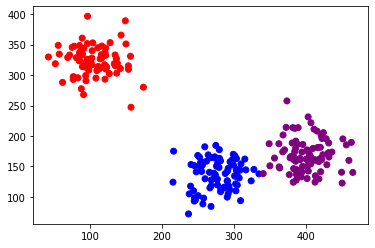

In [11]:
plt.scatter(X, y, color=label_color)

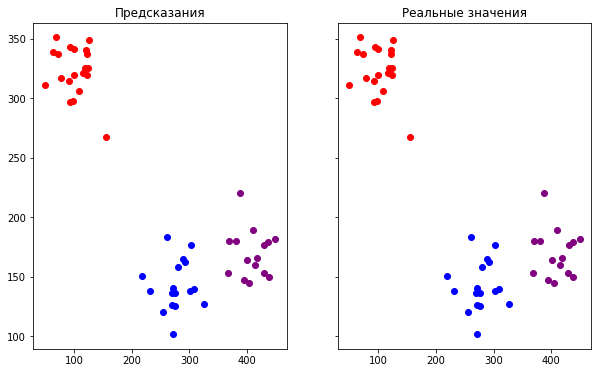

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Предсказания')
ax2.set_title('Реальные значения')
for i in range(len(test)):
    ax1.scatter(test[i][0][0], test[i][0][1], color = colors[pred_label[i]])
    ax2.scatter(test[i][0][0], test[i][0][1], color = colors[actual_label[i]])

In [14]:
cv_scores =[]
neighbors = list(range(3,50,2))
for x in range(1, int(len(test))):
    pred_label = KNN(train, test, x)
    actual_label = [t[1] for t in test]
    scores = sum([int(actual_label[i]==pred_label[i]) for i in range(len(test))]) / float(len(test))
    cv_scores.append(scores)
    mse = [1-x for x in cv_scores]
    optimal_k = neighbors[mse.index(min(mse))]
print("Оптимальное k = {}".format(optimal_k))

Оптимальное k = 3
